<a href="https://colab.research.google.com/github/virb30/portfolio/blob/master/notebooks/009_EDS_Projeto_Fashion_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Classificação de Routpas usando Deep Learning

***Fashion MNIST*** é um dataset considerado o *Hello World* de **Deep Learning** aplicado a problemas de **Visão Computacional**.

Contendo 60 mil imagens para treinamento e 10 mil para teste, é um dataset bem melhor que o antigo MNIST (que continha apenas digitos manuscritos).

<p align="center"><img src="https://raw.githubusercontent.com/virb30/portfolio/master/img/fashion-mnist-sprite.png" height="400px"></p>

Ao total, as 70 mil imagens têm dimensões 28x28 pixels. Cada imagem é classificada com um dos 10 *labels* abaixo:
<table>
  <thead>
    <th>Label</th>
    <th>Class</th>
  </thead>
  <tbody>
    <tr>
      <td>0</td>
      <td>T-shirt/top</td>
    </tr>
    <tr>
      <td>1</td>
      <td>Trouser</td>
    </tr>
    <tr>
      <td>2</td>
      <td>Pullover</td>
    </tr>
    <tr>
      <td>3</td>
      <td>Dress</td>
    </tr>
    <tr>
      <td>4</td>
      <td>Coat</td>
    </tr>
    <tr>
      <td>5</td>
      <td>Sandal</td>
    </tr>
    <tr>
      <td>6</td>
      <td>Shirt</td>
    </tr>
    <tr>
      <td>7</td>
      <td>Sneaker</td>
    </tr>
    <tr>
      <td>8</td>
      <td>Bag</td>
    </tr>
    <tr>
      <td>9</td>
      <td>Ankle boot</td>
    </tr>
  </tbody>
</table>

## Obtenção do dados

Podemos obter os dados do Fashion MNIST de duas fontes:
*  Pelo repositório no Github
*  Carregando a partir do TensorFlow

Para esse projeto
 iremos utilizar a segunda opção

In [1]:
# importando bibliotecas necessárias
%tensorflow_version 2.x
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
from sklearn.metrics import classification_report

# melhorar a visualização
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
mpl.style.use('ggplot')
plt.style.use('fivethirtyeight')
sns.set(context='notebook', palette='dark', style='whitegrid')

In [2]:
# carregar os dados do Fashion MNIST
(X_train_orig, y_train_orig), (X_test_orig, y_test_orig) = keras.datasets.fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


Seguindo a padronização da documentação, criaremos uma lista com os *labels* traduzidas para o português

In [3]:
# De acordo com a documentação os labels são:
class_names = ['Camisetas/top', 'Calça', 'Suéter', 
               'Vestido', 'Casaco', 'Sandálias', 
               'Camisa', 'Tênis', 'Bolsa', 'Botas']

## Exploração dos dados

Apesar desse conjunto de dados vir previamente processado e bem documentado, exploraremos rapidamente a fim de tirar alguns *insights*. Primeiramente, iremos verificar as dimensões dos *arrays* carregados pelo `load_data()`.



In [4]:
# ver a dimensionalidade dos DataFrames
print("Dimensionalidade dos DataFrames:")
print("X_train_orig: ", X_train_orig.shape)
print("y_train_orig: ", y_train_orig.shape)
print("X_test_orig: ", X_test_orig.shape)
print("y_test_orig: ", y_test_orig.shape)

Dimensionalidade dos DataFrames:
X_train_orig:  (60000, 28, 28)
y_train_orig:  (60000,)
X_test_orig:  (10000, 28, 28)
y_test_orig:  (10000,)


Conforme documentação, há 60.000 amostras de treino e 10.000 de teste, sendo as imagens 28x28 *pixels* em tons de cinza (1 canal).
Conforme demonstrado nas linhas `X_train_orig: (60000, 28, 28)` e `X_test_orig: (10000, 28, 28)`.


Também é possível ver como uma imagem "se parece" quando é convertida para um *array*. Vale lembrar que os valores de cada pixel estão compreendidos entre [0,255].

In [5]:
# ver uma fatia de uma imagem
print("\n\nImagem convertida em array:\n", X_train_orig[0][:5][:5])



Imagem convertida em array:
 [[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]]


Iremos verificar se os datasets de treino/teste estão balanceados adequadamente. Ou seja, se contém uma proporção ideal entre as diferentes classes.

In [6]:
# verificar  os valores únicos por classes (treino)
print("y_train_orig: ")
np.unique(y_train_orig, return_counts=True)

y_train_orig: 


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000]))

In [7]:
# verificar os valores únicos por classes (teste)
print("y_test_orig: ") 
np.unique(y_test_orig, return_counts=True)

y_test_orig: 


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000]))

Vimos, portanto, que ambos os *datasets* possuem a mesma quantidade de amostras para cada uma das classes.

Agora vamos visualizar algumas imagens com seus *labels*:


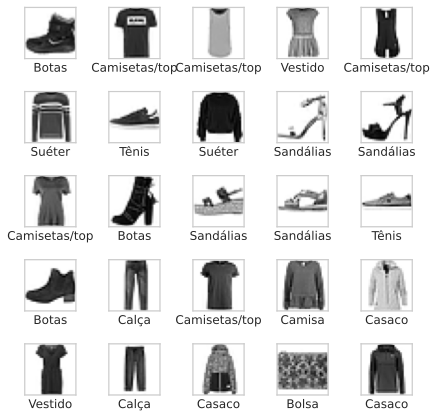

In [8]:
# ver imagens de exemplo
plt.figure(figsize=(6,6))
for i in range(25):
  plt.subplot(5, 5, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(X_train_orig[i], cmap=plt.cm.binary)
  plt.xlabel(class_names[y_train_orig[i]])
plt.tight_layout()


## Pré-processameto dos Dados

Antes de criar o modelo e treinar a rede neural, precisamos realizar algumas etapas de pré-processamento.

### Normalizar os *pixels*

As intensidades dos *pixels* devem ser normalizadas. Para isso iremos converter os valores - que são do tipo `int` compreendidos no intervalo [0, 255] - para o tipo `float` compreendidos no intervalo [0, 1].

Como o valor máximo do *pixel* é 255, para atingirmos o resultado desejado, iremos realizar a divisão de cada um deles por 255.0.

In [9]:
# criar a função lambda que transforma em float32 e normaliza os pixels
f = lambda x: (x / 255.0).astype("float32")

# aplicar a função lambda aos datasets X_train e X_test
X_train = f(X_train_orig)
X_test = f(X_test_orig)

### Redimensionar as imagens
O primeiro *layer* convolucional espera um único tensor que contenha todos os *pixels*. O TensorFlow espera uma única lista com 4 dimensões e não 60000 itens de dimensões 28x28x1, como é o caso dos nossos *datasets* (de treino e teste). 
Para isso, iremos fazer um `reshape` dos *datasets*, para que eles assumam o formato `(60000, 28, 28, 1)` e `(10000, 28, 28, 1)` respectivamente.

In [10]:
# redimensionar as imagens
X_train = X_train.reshape((X_train.shape[0], 28, 28, 1))
X_test = X_test.reshape((X_test.shape[0], 28, 28, 1))

print(f"X_train:{X_train.shape}")
print(f"X_test:{X_test.shape}")

X_train:(60000, 28, 28, 1)
X_test:(10000, 28, 28, 1)


## Integer Encoding vs One-Hot Encoding

Nos *datasets* utilizados, os *labels* estão codificados entre 0 e 9, naquilo que chamamos de *Integer Ecoding*, essa técnica é suficiente quando temos relação de ordem entre as classes, o que não ocorre em nosso exemplo.

Apesar de ser possível utilizar diretamente `y_train` e `y_test`, desde que se use `loss="sparse_categorical_crossentropy"`, utilizá-los diretamente pode levar nosso modelo a um desempenho, inferior.

Por isso, iremos utilizar a técnica de *One-Hot Encoding*, que consiste em transformar cada um dos *labels* em variáveis binárias. Assim, ao invés de,cada imagem ser classificada de 0 a 9, teríamos algo semelhante a:

<table>
  <thead>
    <tr>
      <th>Camisetas/top</th>
      <th>Calça</th>
      <th>Suéter</th>
      <th>Vestido</th>
      <th>Casaco</th>
      <th>Sandálias</th>
      <th>Camisa</th>
      <th>Tênis</th>
      <th>Bolsa</th>
      <th>Botas</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td>1</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
    </tr>
    <tr>
      <td>0</td>
      <td>1</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
    </tr>
    <tr>
      <td>0</td>
      <td>0</td>
      <td>1</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
    </tr>
    <tr>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>1</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
    </tr>
    <tr>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>1</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
    </tr>
    <tr>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>1</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
    </tr>
    <tr>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>1</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
    </tr>
    <tr>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>1</td>
      <td>0</td>
      <td>0</td>
    </tr>
    <tr>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>1</td>
      <td>0</td>
    </tr>
    <tr>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>1</td>
    </tr>
  </tbody>
</table>

Exemplificando essa transformação de *Integer Encoding* para *One-Hot Encoding*:

In [11]:
example = np.array([1, 3, 4, 2, 0])
print("Exemplo antes do One-Hot Encoding:")
print(example)

example_encoded = keras.utils.to_categorical(example)
print("Exemplo depois do One-Hot Encoding:")
print(example_encoded)

Exemplo antes do One-Hot Encoding:
[1 3 4 2 0]
Exemplo depois do One-Hot Encoding:
[[0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0.]
 [1. 0. 0. 0. 0.]]


Aplicaremos o *One-Hot Encoding* aos *labels* de nossos *datasets*:

In [12]:
y_train = keras.utils.to_categorical(y_train_orig)
y_test = keras.utils.to_categorical(y_test_orig)

## Definindo uma Rede Neural Convolucional

Existem diversas arquiteturas consagradas de Redes Neurais Convolucionais. Para este projeto, utilizaremos uma arquitetura simplificada da VGGNet do Adrian Rosenbroke (https://www.pyimagesearch.com/2017/03/20/imagenet-vggnet-resnet-inception-xception-keras/).

Adaptada pelo Carlos Melo (Sigmoidal), a fim de adequar as dimensões 28x28 das imagens e permitir o uso da API Keras.


In [13]:
# Baseado na implementação da MiniVGGNet do Adrian Rosenbroke
# first CONV => RELU => CONV => RELU => POOL layer set
model = keras.models.Sequential()
model.add(keras.layers.Conv2D(32, 3, padding="same", activation="relu"))
model.add(keras.layers.BatchNormalization(axis=1))
model.add(keras.layers.Conv2D(32, (3, 3), padding="same", activation="relu"))
model.add(keras.layers.BatchNormalization(axis=1))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))
model.add(keras.layers.Dropout(0.25))

# second CONV => RELU => CONV => RELU => POOL layer set
model.add(keras.layers.Conv2D(64, (3, 3), padding="same", activation="relu"))
model.add(keras.layers.BatchNormalization(axis=1))
model.add(keras.layers.Conv2D(64, (3, 3), padding="same", activation="relu"))
model.add(keras.layers.BatchNormalization(axis=1))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))
model.add(keras.layers.Dropout(0.25))

# first (and only) set of FC => RELU layers
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(512, activation='relu'))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Dropout(0.5))

# softmax classifier
model.add(keras.layers.Dense(10, activation='softmax'))

Conforme mencionado anteriormente, uma vez que os *labels* estão *one-hot encoded* podemos utilizar `loss="categorical_crossentropy"` para compilar o modelo.

Também iremos informar o explicitamente o uso de dados de validação na proporção 1/3.

In [17]:
# compilar modelo
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# treinar o modelo
history = model.fit(X_train, y_train, epochs=20, validation_split=0.25)

Epoch 1/20
1407/1407 [==============================] - 10s 6ms/step - loss: 0.1725 - accuracy: 0.9368 - val_loss: 0.1856 - val_accuracy: 0.9345
Epoch 2/20
1407/1407 [==============================] - 9s 6ms/step - loss: 0.1600 - accuracy: 0.9409 - val_loss: 0.2364 - val_accuracy: 0.9165
Epoch 3/20
1407/1407 [==============================] - 9s 6ms/step - loss: 0.1564 - accuracy: 0.9413 - val_loss: 0.1940 - val_accuracy: 0.9307
Epoch 4/20
1407/1407 [==============================] - 9s 6ms/step - loss: 0.1484 - accuracy: 0.9468 - val_loss: 0.1987 - val_accuracy: 0.9288
Epoch 5/20
1407/1407 [==============================] - 9s 6ms/step - loss: 0.1445 - accuracy: 0.9467 - val_loss: 0.1973 - val_accuracy: 0.9329
Epoch 6/20
1407/1407 [==============================] - 9s 6ms/step - loss: 0.1325 - accuracy: 0.9506 - val_loss: 0.1882 - val_accuracy: 0.9340
Epoch 7/20
1407/1407 [==============================] - 9s 6ms/step - loss: 0.1228 - accuracy: 0.9534 - val_loss: 0.2043 - val_accuracy

## Avaliando o Modelo

No geral, o nosso modelo atingiu uma acurácia de 96.91% nos dados de treino e 93.87% nos dados de validação.

No entanto, se observarmos melhor veremos que ela não teve o desempenho bom para a categoria "Camisas". Provavelmente isso pode ser melhorados com técnicas de *data augmentation*

In [22]:
y_hat = model.predict(X_test)
y_hat_classes = np.argmax(y_hat, axis=1)

print(classification_report(y_test_orig, y_hat_classes, target_names=class_names))

               precision    recall  f1-score   support

Camisetas/top       0.85      0.92      0.88      1000
        Calça       1.00      0.98      0.99      1000
       Suéter       0.92      0.92      0.92      1000
      Vestido       0.92      0.94      0.93      1000
       Casaco       0.90      0.91      0.90      1000
    Sandálias       0.99      0.99      0.99      1000
       Camisa       0.84      0.77      0.80      1000
        Tênis       0.96      0.99      0.97      1000
        Bolsa       0.99      0.98      0.99      1000
        Botas       0.98      0.96      0.97      1000

     accuracy                           0.94     10000
    macro avg       0.94      0.94      0.94     10000
 weighted avg       0.94      0.94      0.94     10000



Olhando as curvas *accuracy* e *val_accuracy*, identifica-se talvez um pequeno *overfitting*, mas que não prejudicou muito o desempenho da CNN perante aos dados de validação

Por fim, vemos que a acurácia no *dataset* de teste se mantém muito boa, o que significa que o modelo é genérico o suficiente para lidar com dados novos.

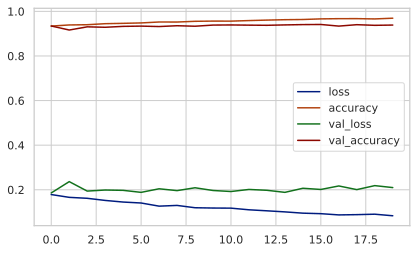

In [23]:
pd.DataFrame(history.history).plot()
plt.show()

## Melhorias Futuras...